Импортирую необходимые библиотеки

In [5]:
import numpy as np
import pandas as pd
from datetime import timedelta, datetime
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns; sns.set()
import os

Скачиваем файлы

In [6]:
os.chdir("/Users/greko/Downloads")
data = pd.read_csv("music_data.csv", parse_dates=['utc_audition_end_dttm', 'utc_audition_start_dttm'])

Размерность выборки

In [7]:
data.shape

(842397, 8)

In [8]:
data.describe()

,Unnamed: 0,track_duration
count,842397.000000,842397.000000
mean,421198.000000,651.026261
std,243179.211694,900.259585
min,0.000000,240.635442
25%,210599.000000,366.486757
50%,421198.000000,407.273724
75%,631797.000000,465.304148
max,842396.000000,4786.285463


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842397 entries, 0 to 842396
Data columns (total 8 columns):
Unnamed: 0                 842397 non-null int64
audition_id                842397 non-null object
track_duration             842397 non-null float64
track_genre                842397 non-null object
track_id                   842397 non-null object
user_id                    842397 non-null object
utc_audition_end_dttm      842397 non-null datetime64[ns, UTC]
utc_audition_start_dttm    842397 non-null datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](2), float64(1), int64(1), object(4)
memory usage: 51.4+ MB


In [10]:
data.head(5)

,Unnamed: 0,audition_id,track_duration,track_genre,track_id,user_id,utc_audition_end_dttm,utc_audition_start_dttm
0,0,3fecd60bf5564de7bb0064335f482b4d,336.629082,RAP,efd614e5-239a-418e-b39c-181b43719b62,a72d73ea124840698aa8,2021-02-28 12:32:10.776000+00:00,2021-02-28 12:31:01.865000+00:00
1,1,8ae1703df8354ee6b8d39ce2ceae4508,428.797846,VOCAL,d4697e6e-698a-41e8-8e15-ec890c94751e,066cc9287de340f281ba,2021-01-19 12:13:43.369000+00:00,2021-01-19 12:12:48.185000+00:00
2,2,44383125d98a4d939e7f294602674fc6,463.467143,METAL,e006afab-c832-4d07-8cd0-7d4a9c2aabe8,95ed23b52b104f66b4b1,2021-02-27 19:53:57.143000+00:00,2021-02-27 19:52:42.470000+00:00
3,3,a90b74992c9f4046a68935cb83ced7ee,323.746259,HARDROCK,c2ea845c-fcba-480a-b41a-d58bf9493375,b0a6dcec6f604b50b37e,2021-02-24 01:51:44.526000+00:00,2021-02-24 01:46:25.549000+00:00
4,4,0d98a88fba0a4dc3bb0444089a0ce16b,316.888403,POP,ad68738c-2a38-4e0f-910a-71bb0aa0a0c0,6788b1c78a724de488c9,2020-12-24 05:04:32.855000+00:00,2020-12-24 05:00:09.645000+00:00


In [11]:
data.max()

Unnamed: 0                                               842396
audition_id                    ffffe2fa7b50411085028fdb3d8b6dce
track_duration                                          4786.29
track_genre                                               VOCAL
track_id                   ffffa797-6b90-407b-b5f4-92e5c2995507
user_id                                    ffe8e02a691746d18159
utc_audition_end_dttm          2021-03-01 17:06:21.205000+00:00
utc_audition_start_dttm        2021-03-01 15:59:56.310000+00:00
dtype: object

Количество пользователей в dataset

In [12]:
len(data['user_id'].unique())

1727

Количество трэков

In [13]:
len(data['track_id'].unique())

4892

In [29]:
type_track = data['track_genre'].unique()

# Предобработка данных

Уберем данные, в которых время прослушивания трэка меньше 10 секунд

In [15]:
sec = timedelta(seconds=10)

data = data.loc[data['utc_audition_end_dttm'] - data['utc_audition_start_dttm'] > sec]
data.shape

(839179, 8)

Уберем из выборки прослушивания старше пяти месяцев

In [16]:
from datetime import datetime, timezone

data = data.loc[(pd.to_datetime("2021-04-24 12:13:43.261724+00:00") - data['utc_audition_start_dttm']).dt.days < 180]
data.shape

(837608, 8)

In [17]:
type_track = data['track_genre'].unique()
type_track = ['RAP','METAL', 'HARDROCK', 'DUBSTEP', 'ELECTRONICS', 'ROCK', 'POP', 'TECHNO', 'DISCO', 'KPOP', 'PODCASTS', 'HOUSE', 'VOCAL', 'DANCE', 'INDUSTRIAL', 'RNB', 'JAZZ', 'CLASSICAL', 'RELAX', 'POSTROCK', 'PUNK', 'BLUES']

Сгруппирую нашу выборку, в ней будут находиться: количество прослушенных треков определенного жанра, его процент от всех прослушиваний пользователя, количество всех прослушенных трэков пользователя 

In [18]:
grouped = data.groupby('user_id')['track_genre'].agg([
                                            lambda x: sum(x==type_track[7]),# TECHNO 
                                            lambda x: sum(x==type_track[7])/x.count(),
                                            lambda x: sum(x==type_track[1]),
                                            lambda x: sum(x==type_track[1])/x.count(),
                                            lambda x: sum(x==type_track[2]),
                                            lambda x: sum(x==type_track[2])/x.count(),
                                            lambda x: sum(x==type_track[3]),
                                            lambda x: sum(x==type_track[3])/x.count(),
                                            lambda x: sum(x==type_track[4]), # POP
                                            lambda x: sum(x==type_track[4])/x.count(),
                                            lambda x: sum(x==type_track[5]),
                                            lambda x: sum(x==type_track[5])/x.count(),
                                            lambda x: sum(x==type_track[6]),
                                            lambda x: sum(x==type_track[6])/x.count(),
                                            lambda x: sum(x==type_track[0]),
                                            lambda x: sum(x==type_track[0])/x.count(),
                                            lambda x: sum(x==type_track[8]),
                                            lambda x: sum(x==type_track[8])/x.count(),
                                            lambda x: sum(x==type_track[9]),
                                            lambda x: sum(x==type_track[9])/x.count(),
                                            lambda x: sum(x==type_track[10]),
                                            lambda x: sum(x==type_track[10])/x.count(),
                                            lambda x: sum(x==type_track[11]),                   
                                            lambda x: sum(x==type_track[11])/x.count(),
                                            lambda x: sum(x==type_track[12]),
                                            lambda x: sum(x==type_track[12])/x.count(),
                                            lambda x: sum(x==type_track[13]),
                                            lambda x: sum(x==type_track[13])/x.count(),
                                            lambda x: sum(x==type_track[14]),
                                            lambda x: sum(x==type_track[14])/x.count(),
                                            lambda x: sum(x==type_track[15]),
                                            lambda x: sum(x==type_track[15])/x.count(),
                                            lambda x: sum(x==type_track[16]),                   
                                            lambda x: sum(x==type_track[16])/x.count(),
                                            lambda x: sum(x==type_track[17]),
                                            lambda x: sum(x==type_track[17])/x.count(),
                                            lambda x: sum(x==type_track[18]),
                                            lambda x: sum(x==type_track[18])/x.count(),
                                            lambda x: sum(x==type_track[19]),
                                            lambda x: sum(x==type_track[19])/x.count(),
                                            lambda x: sum(x==type_track[20]),
                                            lambda x: sum(x==type_track[20])/x.count(),
                                            lambda x: sum(x==type_track[21]),
                                            lambda x: sum(x==type_track[21])/x.count(),
                                            'count'])
grouped = grouped.rename(columns = {'<lambda_0>':'TECHNO',
                         '<lambda_2>': 'METAL',
                         '<lambda_4>': 'HARDROCK',
                         '<lambda_6>': 'DUBSTEP',
                         '<lambda_8>': 'ELECTRONICS',
                         '<lambda_10>':'ROCK',
                         '<lambda_12>':'POP',
                         '<lambda_14>':'RAP',
                         '<lambda_16>':'DISCO',
                         '<lambda_18>':'KPOP',
                         '<lambda_20>':'PODCASTS',
                         '<lambda_22>':'HOUSE',
                         '<lambda_24>':'VOCAL',
                         '<lambda_26>':'DANCE',
                         '<lambda_28>':'INDUSTRIAL',
                         '<lambda_30>':'RNB',
                         '<lambda_32>':'JAZZ',
                         '<lambda_34>':'CLASSICAL',
                         '<lambda_36>':'RELAX',
                         '<lambda_38>':'POSTROCK',
                         '<lambda_40>':'PUNK',
                         '<lambda_42>':'BLUES',
                         '<lambda_1>': 'Per_TECHNO',
                         '<lambda_3>': 'Per_METAL',
                         '<lambda_5>': 'Per_HARDROCK',
                         '<lambda_7>': 'Per_DUBSTEP',
                         '<lambda_9>': 'Per_ELECTRONICS',
                         '<lambda_11>':'Per_ROCK',
                         '<lambda_13>':'Per_POP',
                         '<lambda_15>':'Per_RAP',
                         '<lambda_17>':'Per_DISCO',
                         '<lambda_19>':'Per_KPOP',
                         '<lambda_21>':'Per_PADCASTS',
                         '<lambda_23>':'Per_HOUSE',
                         '<lambda_25>':'Per_VOCAL',
                         '<lambda_27>':'Per_DANCE',
                         '<lambda_29>':'Per_INDUSTRIAL',
                         '<lambda_31>':'Per_RNB',
                         '<lambda_33>':'Per_JAZZ',
                         '<lambda_35>':'Per_CLASSICAL',
                         '<lambda_37>':'Per_RELAX',
                         '<lambda_39>':'Per_POSTROCK',
                         '<lambda_41>':'Per_PUNK',
                         '<lambda_43>':'Per_BLUES'})
grouped.head(5)

,TECHNO,Per_TECHNO,METAL,Per_METAL,HARDROCK,Per_HARDROCK,DUBSTEP,Per_DUBSTEP,ELECTRONICS,Per_ELECTRONICS,...,Per_CLASSICAL,RELAX,Per_RELAX,POSTROCK,Per_POSTROCK,PUNK,Per_PUNK,BLUES,Per_BLUES,count
user_id,,,,,,,,,,,,,,,,,,,,,
002123faf66b47b5aafa,23,0.067055,22,0.064140,17,0.049563,18,0.052478,12,0.034985,...,0.008746,2,0.005831,0,0.000000,6,0.017493,1,0.002915,343
0041383820e248e487a6,77,0.072573,63,0.059378,75,0.070688,71,0.066918,36,0.033930,...,0.007540,12,0.011310,0,0.000000,14,0.013195,7,0.006598,1061
008005a451764a63aa3f,42,0.066142,34,0.053543,36,0.056693,46,0.072441,25,0.039370,...,0.003150,7,0.011024,2,0.003150,8,0.012598,7,0.011024,635
00c017dc34254d39a390,50,0.079618,32,0.050955,35,0.055732,38,0.060510,38,0.060510,...,0.006369,5,0.007962,1,0.001592,7,0.011146,2,0.003185,628
00f628a2f8044ae18d88,35,0.084746,26,0.062954,25,0.060533,17,0.041162,13,0.031477,...,0.002421,5,0.012107,1,0.002421,6,0.014528,2,0.004843,413


Характеристика прослушенных треков среди всех пользователей

In [19]:
grouped['count'].describe()

count    1727.000000
mean      485.007528
std       142.658021
min        67.000000
25%       393.000000
50%       482.000000
75%       579.000000
max      1061.000000
Name: count, dtype: float64

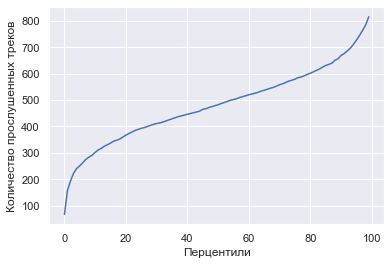

In [20]:
percentile = np.percentile(grouped['count'], np.arange(0, 100, 1)) 

plt.plot( np.arange(0, 100, 1), percentile)
plt.xlabel('Перцентили')
plt.ylabel('Количество прослушенных треков')
plt.show()

Уберу пользователей, которые мало слушают музыку (меньше 350 прослушанных треков).

Тут надо сделать $важную$ оговорку: делая такое преобразование, я подразумеваю, что dataset собирался из пользователей, которые были зарегистрированы  не позднее 5 месяцев до непосредственно анализа.

In [21]:
grouped = grouped.loc[grouped['count'] > 350]
grouped

,TECHNO,Per_TECHNO,METAL,Per_METAL,HARDROCK,Per_HARDROCK,DUBSTEP,Per_DUBSTEP,ELECTRONICS,Per_ELECTRONICS,...,Per_CLASSICAL,RELAX,Per_RELAX,POSTROCK,Per_POSTROCK,PUNK,Per_PUNK,BLUES,Per_BLUES,count
user_id,,,,,,,,,,,,,,,,,,,,,
0041383820e248e487a6,77,0.072573,63,0.059378,75,0.070688,71,0.066918,36,0.033930,...,0.007540,12,0.011310,0,0.000000,14,0.013195,7,0.006598,1061
008005a451764a63aa3f,42,0.066142,34,0.053543,36,0.056693,46,0.072441,25,0.039370,...,0.003150,7,0.011024,2,0.003150,8,0.012598,7,0.011024,635
00c017dc34254d39a390,50,0.079618,32,0.050955,35,0.055732,38,0.060510,38,0.060510,...,0.006369,5,0.007962,1,0.001592,7,0.011146,2,0.003185,628
00f628a2f8044ae18d88,35,0.084746,26,0.062954,25,0.060533,17,0.041162,13,0.031477,...,0.002421,5,0.012107,1,0.002421,6,0.014528,2,0.004843,413
013962f5b3f9491dac4f,42,0.080460,29,0.055556,37,0.070881,30,0.057471,22,0.042146,...,0.005747,5,0.009579,1,0.001916,7,0.013410,5,0.009579,522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ff77d34a23c04d36a421,33,0.082500,20,0.050000,26,0.065000,29,0.072500,24,0.060000,...,0.000000,3,0.007500,0,0.000000,14,0.035000,1,0.002500,400
ff9b606118d449f1ab15,29,0.068558,30,0.070922,20,0.047281,25,0.059102,12,0.028369,...,0.002364,4,0.009456,0,0.000000,1,0.002364,2,0.004728,423
ffa2421c514844c087f3,31,0.049839,33,0.053055,44,0.070740,21,0.033762,35,0.056270,...,0.003215,9,0.014469,0,0.000000,5,0.008039,4,0.006431,622


Отсортирую dataset относительно процента прослушиваний пользователями Техно

In [28]:
grouped_sorted = grouped.sort_values('Per_TECHNO', ascending=False)  

Проанализируем жанры по их прослушиваемости

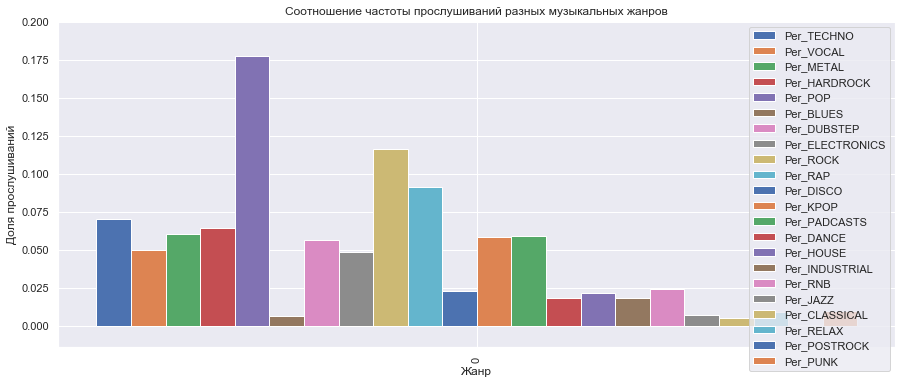

In [23]:
per_value = ['Per_TECHNO','Per_VOCAL','Per_METAL','Per_HARDROCK','Per_POP','Per_BLUES','Per_DUBSTEP','Per_ELECTRONICS','Per_ROCK','Per_RAP','Per_DISCO','Per_KPOP','Per_PADCASTS','Per_DANCE','Per_HOUSE','Per_INDUSTRIAL','Per_RNB','Per_JAZZ','Per_CLASSICAL','Per_RELAX','Per_POSTROCK','Per_PUNK']
value_mean = {}
for i in  per_value:
    value_mean[i] = [np.mean(grouped[i].iloc[0:1727])]
value_mean_pd = pd.DataFrame(value_mean)
value_mean_pd.plot(kind='bar', figsize=(15,6))
plt.title("Соотношение частоты прослушиваний разных музыкальных жанров")
plt.ylabel("Доля прослушиваний")
plt.xlabel("Жанр")
plt.axis('equal')
plt.show()

Из логов видно, что самым полпулярным жанром является POP, ТЕХНО занимает четвертое место по популярности, а второе и третье место занимают РЭП и РОК. Из этого можно сделать вывод, что преобладющая аудитория сервиса - это молодеж (до 35 лет).  

Давайте теперь более детально посмотрим на слушателей, которые отдают свое предпочтение Техно. Для этого отсортируем относительно процента прослушиваний Техно. Возьмем сто самых ярых поклонников данного жанра и посмотрим на их 10 любимых жанров. 

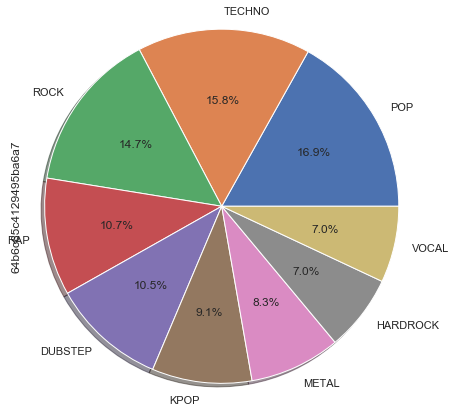

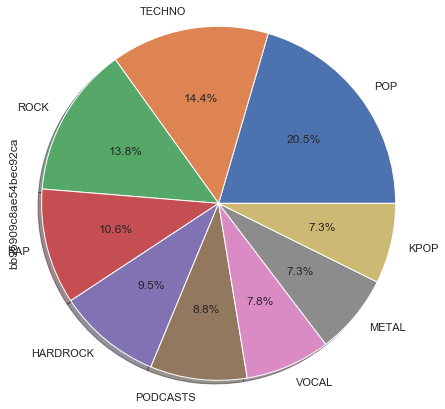

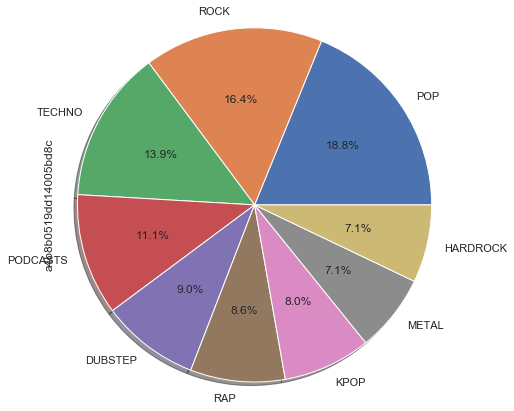

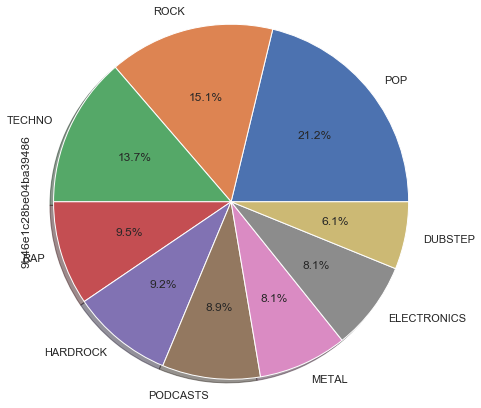

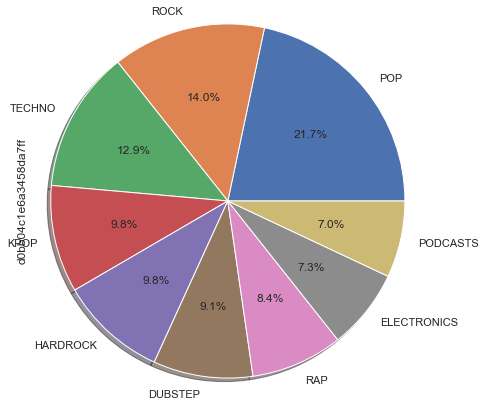

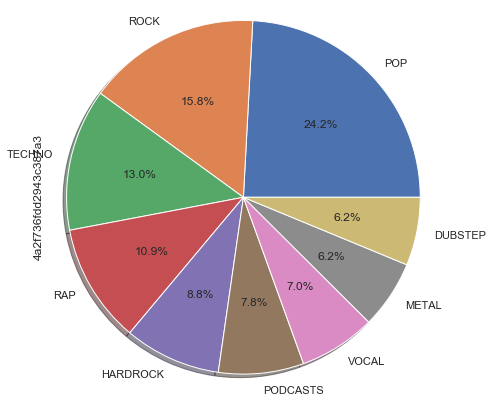

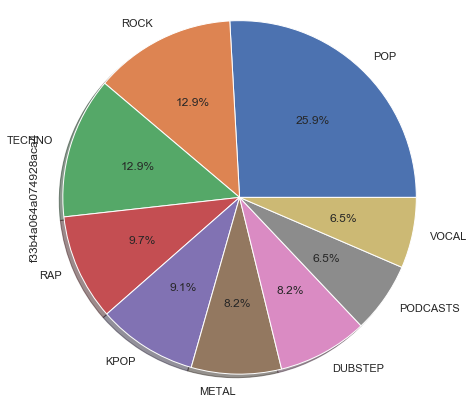

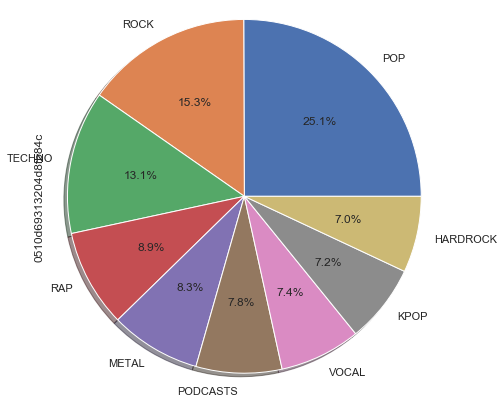

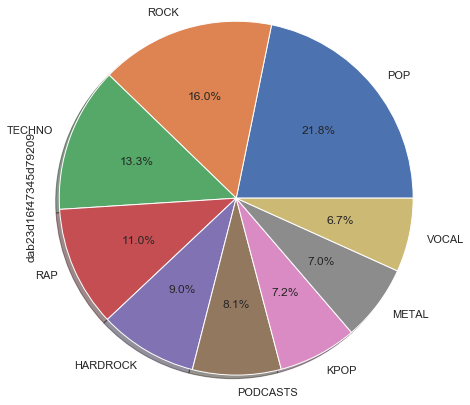

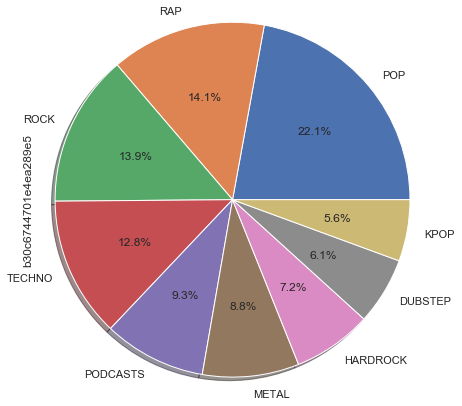

In [24]:
import matplotlib.mlab as mlab

for i in range(0,10):
    sort = grouped_sorted.iloc[i].sort_values(ascending=False)[1:10]
    sort.plot(kind='pie', y = '', figsize=(7,7),
                      autopct='%1.1f%%',
                      shadow=True,)
    plt.axis('equal')
    plt.show()

У первых 10 пользователей можно заметить простую закономерность, им всем нравятся жанры: POP, ROCK, RAP.

Давайте проверим следующую гипотузу: отличительной чертой классы слушателей, которым нравится Техно, является высокий процент прослушивний жанров Поп, Рок и Рэпа. 

Для этого напишем функцию, которая возвращает график процентов прослушиваний каждого жанра у среза пользователей отсортированного dataset.

In [25]:
per_value = ['Per_TECHNO','Per_VOCAL','Per_METAL','Per_HARDROCK','Per_POP','Per_BLUES','Per_DUBSTEP','Per_ELECTRONICS','Per_ROCK','Per_RAP','Per_DISCO','Per_KPOP','Per_PADCASTS','Per_DANCE','Per_HOUSE','Per_INDUSTRIAL','Per_RNB','Per_JAZZ','Per_CLASSICAL','Per_RELAX','Per_POSTROCK','Per_PUNK']
per_value_colors = {'Per_TECHNO':'blue','Per_VOCAL':'r','Per_METAL':'green','Per_HARDROCK':'','Per_POP':'','Per_BLUES':'','Per_DUBSTEP':'','Per_ELECTRONICS':'','Per_ROCK':'','Per_RAP':'','Per_DISCO':'','Per_KPOP':'','Per_PADCASTS':'','Per_DANCE':'','Per_HOUSE':'','Per_INDUSTRIAL':'','Per_RNB':'','Per_JAZZ':'','Per_CLASSICAL':'','Per_RELAX':'','Per_POSTROCK':'','Per_PUNK':''}
value_mean = {}
def func(sample_size1,sample_size2):
    for i in  per_value:
        value_mean[i] = [np.mean(grouped_sorted[i].iloc[sample_size1:sample_size2])]
        
    value_mean_pd = pd.DataFrame(value_mean)
    value_mean_pd = {i:value_mean_pd.loc[i].sort_values(ascending=False) for i in value_mean_pd.index}
    
    value_mean_pd = pd.DataFrame(value_mean_pd).T
    
    value_mean_pd.plot(kind='bar', figsize=(15,6))
    plt.title(f"Соотношение частоты прослушиваний разных музыкальных жанров. Срез: {sample_size1} - {sample_size2}")
    plt.ylabel("Доля прослушиваний")
    plt.xlabel("Жанр")    

    plt.axis('equal')
    plt.show()

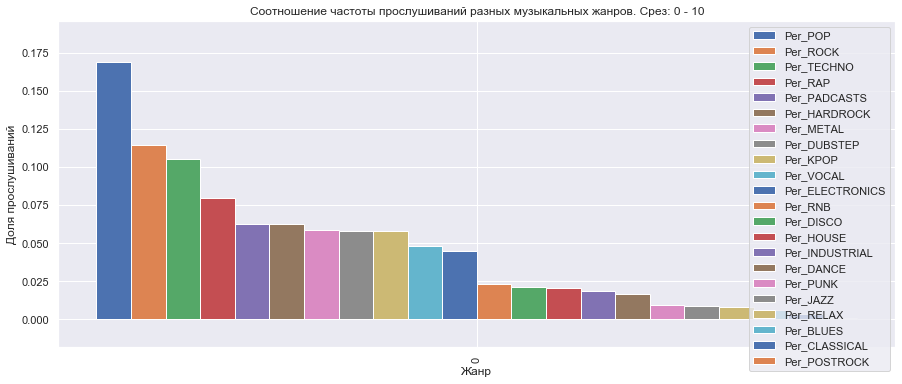

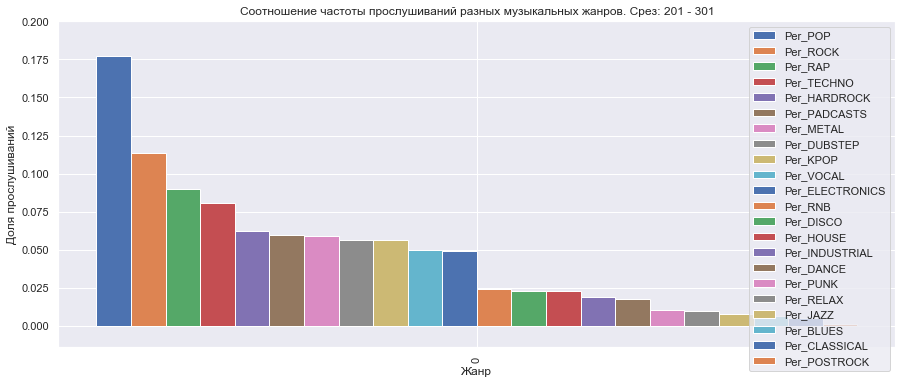

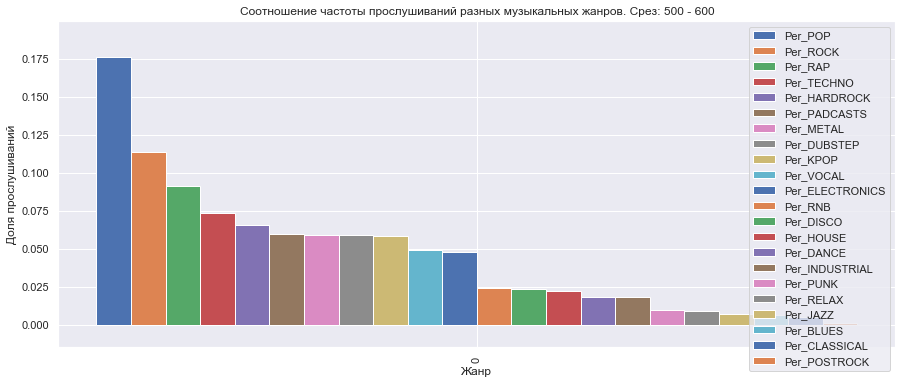

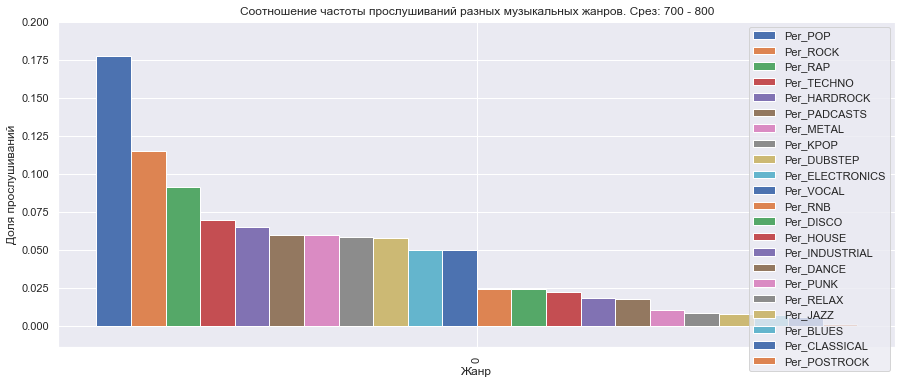

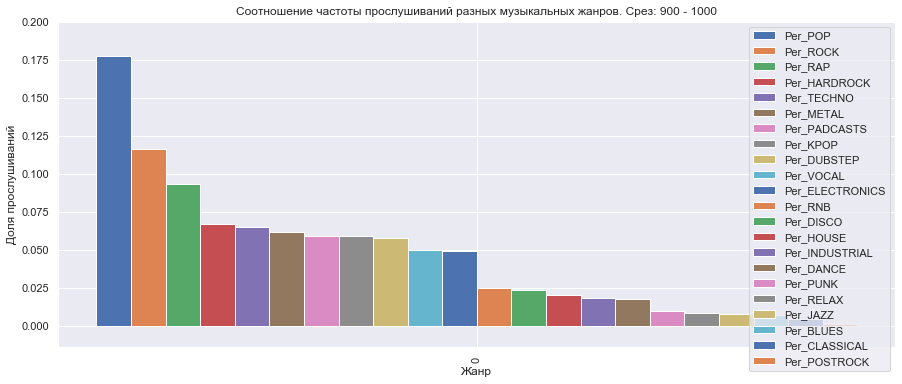

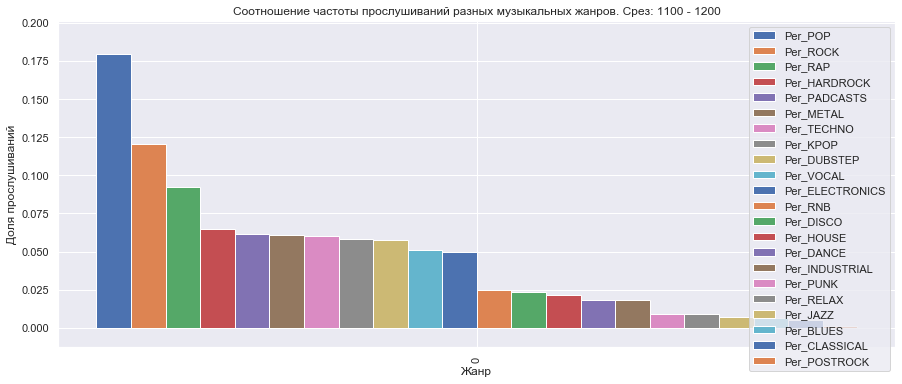

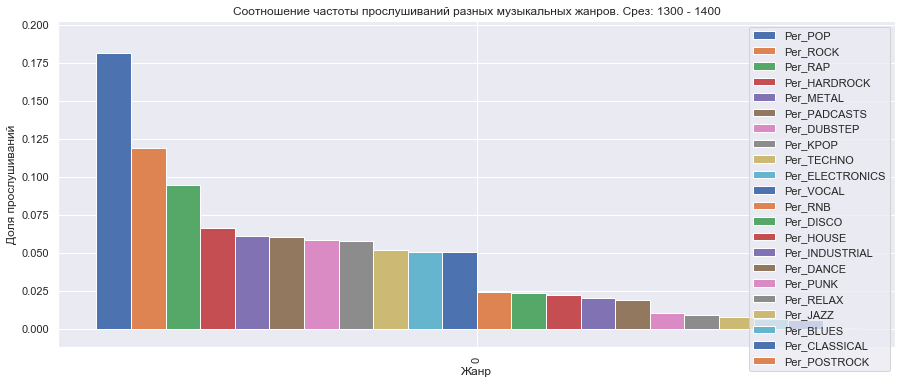

In [26]:
func(0, 10)
func(201, 301)
func(500, 600)
func(700, 800)
func(900, 1000)
func(1100, 1200)
func(1300, 1400)

Гипотеза оказалась ложной. Не зависимо, от процента прослушиваний жанра Техно, процент Поп, Рок, Рэп остается отностильно неизменным. Также можно сделать следующий вывод: процент прослушиваний всех жанров остается неизменным относительно процента Техно.

# Вывод:

Ивану я советую взять мой подготовленный dataset(grouped_sorted) и в зависимости от финансовых возможностей, а также от общего количества билетов на фестеваль, взять необходимый ему срез слушателей.  

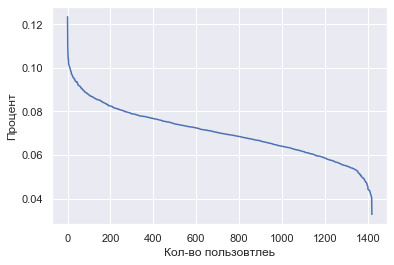

In [27]:
plt.plot(np.arange(0, 1420, 1), grouped_sorted['Per_TECHNO'])
plt.xlabel('Кол-во пользовтлеь')
plt.ylabel('Процент')
plt.show()